In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
%matplotlib inline


In [3]:
dd_df = pd.read_excel('data_days.xlsx')

In [4]:
dd_df.tail()

,Unnamed: 0,Branch,شماره مشتری,تاریخ,stock_code,نام کالا,quantity,اتلاف,unit_price
475907,475907,اصفهان,49431963,11/17/2019,5370,شیر 250 cc,5.0,0.0,14000
475908,475908,اصفهان,49431963,11/17/2019,8596,آب پرتقال 250 cc,5.0,0.0,14000
475909,475909,اصفهان,49431963,11/17/2019,8775,آب آلبالو 250 cc,5.0,0.0,14000
475910,475910,اصفهان,49431963,12/7/2019,5585,دلستر خانواده,-1.0,1.0,30000
475911,475911,اصفهان,49431963,12/28/2019,5585,دلستر خانواده,-1.0,1.0,30000


In [5]:
dd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475912 entries, 0 to 475911
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   475912 non-null  int64  
 1   Branch       475912 non-null  object 
 2   شماره مشتری  475912 non-null  int64  
 3   تاریخ        475912 non-null  object 
 4   stock_code   475912 non-null  int64  
 5   نام کالا     475912 non-null  object 
 6   quantity     475912 non-null  float64
 7   اتلاف        475912 non-null  float64
 8   unit_price   475912 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 32.7+ MB


In [6]:
dd_df.describe()

,Unnamed: 0,شماره مشتری,stock_code,quantity,اتلاف,unit_price
count,475912.000000,4.759120e+05,475912.000000,475912.000000,475912.000000,475912.000000
mean,237955.500000,2.382557e+07,6997.074562,3.363932,0.051854,14272.252013
std,137384.104992,2.024986e+07,2116.073828,3.418666,0.227755,2069.280079
min,0.000000,2.243560e+05,3531.000000,-97.000000,0.000000,14000.000000
25%,118977.750000,4.704180e+06,5370.000000,2.000000,0.000000,14000.000000
50%,237955.500000,4.718950e+06,8596.000000,4.000000,0.000000,14000.000000
75%,356933.250000,4.455419e+07,8775.000000,5.000000,0.000000,14000.000000
max,475911.000000,4.943196e+07,8775.000000,300.000000,24.250000,30000.000000


### rename Columns

In [7]:
dd_df.rename(columns={'شماره مشتری':'CustomerID','تاریخ' :'Date' ,'نام کالا':'Item' , 'اتلاف':'Waste'} , inplace=True)

####  counts

In [8]:
print("Items=", dd_df['Item'].nunique())
print("Customers=", dd_df['CustomerID'].nunique())
print("Branches=", dd_df['Branch'].nunique())

Items= 11
Customers= 11569
Branches= 2


### Date type

In [9]:
dd_df['Date'] = pd.to_datetime(dd_df['Date'])

In [10]:
snapshot_date = max(dd_df['Date']) + dt.timedelta(days=1)
snapshot_date

Timestamp('2019-12-31 00:00:00')

#### checkings

In [11]:
dd_df[dd_df['unit_price']<=0]

,Unnamed: 0,Branch,CustomerID,Date,stock_code,Item,quantity,Waste,unit_price


In [12]:
dd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475912 entries, 0 to 475911
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  475912 non-null  int64         
 1   Branch      475912 non-null  object        
 2   CustomerID  475912 non-null  int64         
 3   Date        475912 non-null  datetime64[ns]
 4   stock_code  475912 non-null  int64         
 5   Item        475912 non-null  object        
 6   quantity    475912 non-null  float64       
 7   Waste       475912 non-null  float64       
 8   unit_price  475912 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 32.7+ MB


#### calculate total

In [13]:
df_cleaned = dd_df.copy()

In [14]:
df_cleaned['Total'] = df_cleaned['unit_price']*df_cleaned['quantity']

In [15]:
df_cleaned['recency'] = (snapshot_date - 
                        df_cleaned['Date']).map(lambda x: x.days)

In [16]:
df_cleaned_not_0=df_cleaned[df_cleaned['Total']>0]

In [17]:
print('Total  :',len(df_cleaned))
print('Total ==0 :',len(df_cleaned[df_cleaned['Total']==0]))
print('Total !=0 :',len(df_cleaned_not_0))
print('Total<0 :',len(df_cleaned_not_0[df_cleaned_not_0['Total']<0]))

Total  : 475912
Total ==0 : 8077
Total !=0 : 406892
Total<0 : 0


In [18]:
df_cleaned_not_0.tail()

,Unnamed: 0,Branch,CustomerID,Date,stock_code,Item,quantity,Waste,unit_price,Total,recency
475905,475905,اصفهان,49431963,2019-11-07,8775,آب آلبالو 250 cc,5.0,0.0,14000,70000.0,54
475906,475906,اصفهان,49431963,2019-11-17,3531,شیر قهوه موکا,5.0,0.0,14000,70000.0,44
475907,475907,اصفهان,49431963,2019-11-17,5370,شیر 250 cc,5.0,0.0,14000,70000.0,44
475908,475908,اصفهان,49431963,2019-11-17,8596,آب پرتقال 250 cc,5.0,0.0,14000,70000.0,44
475909,475909,اصفهان,49431963,2019-11-17,8775,آب آلبالو 250 cc,5.0,0.0,14000,70000.0,44


### Feature Space

In [19]:
customer_grouped = df_cleaned_not_0.groupby('CustomerID')

In [20]:
def get_tenure(data):
    first_purchase = min(data)
    last_purchase = max(data)
    days = (last_purchase - first_purchase).days
     
    return days
 

In [ ]:
# def get_waste_ratio(data):
#     waste = 0
#     total =sum(abs(data))
#     for i in data:
#         if i<0 :
#             waste = waste+i
#     waste_ratio = abs(waste/total)
#     return waste_ratio

In [ ]:
# get_waste_ratio(customer_grouped.get_group(224356)['Total'])

In [ ]:
# Data = customer_grouped.agg({'recency' : 'min',
#                             'Total' : 'sum' ,
#                             'stock_code' : 'count'})

In [ ]:
# Data = customer_grouped.apply(get_tenure).reset_index()

In [21]:
Data = customer_grouped.agg(
    {'recency': 'min',
     'CustomerID': 'count',
     'Total':['sum','mean'],#(get_waste_ratio)],
     'Date':(get_tenure)
    }
)

In [22]:
Data.columns = [' '.join(col).strip() for col in Data.columns.values]

In [23]:
Data.rename(columns={'recency min':'Recency',
                    'CustomerID count' : 'Frequency' ,
                    'Total sum':'Total_value',
                    'Total mean':'Mean_value',
                    'Date get_tenure': 'Tenure',
                    #'Total get_waste_ratio': 'Waste_ratio'
                    } , inplace=True)

In [24]:
Data.head()

,Recency,Frequency,Total_value,Mean_value,Tenure
CustomerID,,,,,
224356,37,28,1309600.0,46771.428571,348
276154,1,18,960400.0,53355.555556,70
279696,14,55,3872400.0,70407.272727,307
1107121,79,5,350000.0,70000.000000,292
1301753,5,406,47076800.0,115952.709360,387


In [ ]:
customer_grouped.get_group(224356)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDE012EB70>,
      dtype=object)

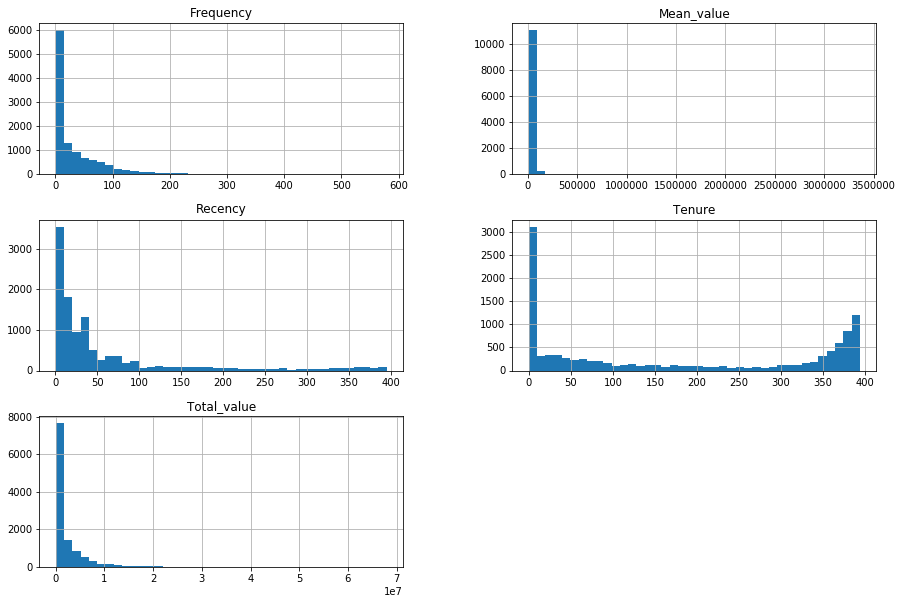

In [25]:
Data.hist(bins=40, figsize=(15, 10))

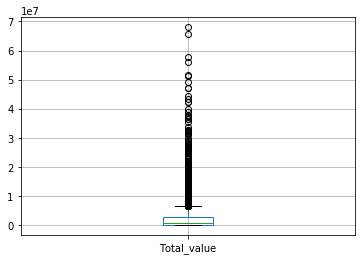

In [26]:
Data.boxplot(['Total_value'])

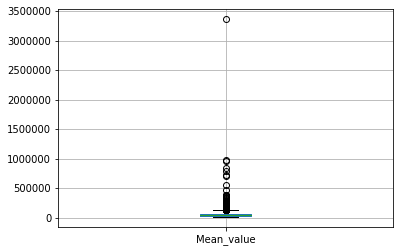

In [27]:
Data.boxplot(['Mean_value'])

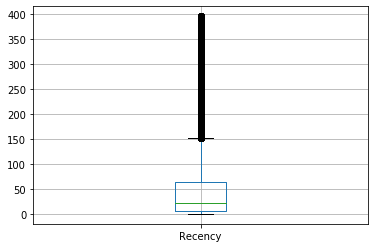

In [28]:
Data.boxplot(['Recency'])

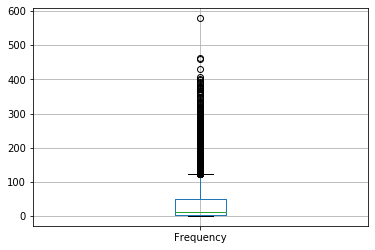

In [29]:
Data.boxplot(['Frequency'])

In [ ]:
# Data.boxplot(['Waste_ratio'])

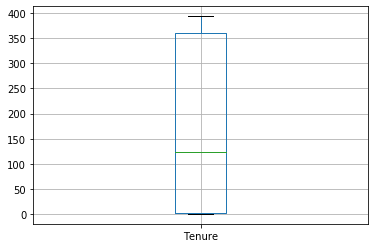

In [30]:
Data.boxplot(['Tenure'])

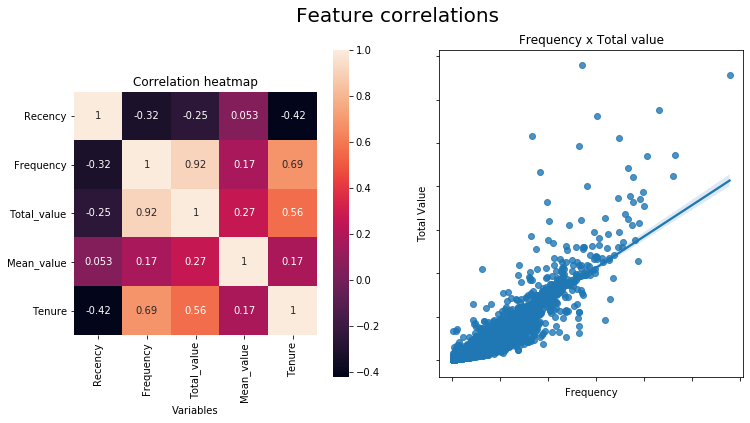

In [31]:
# build a feature correlation matrix
rfm_corr = Data.corr()
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# create a heatmap to display the correlations
sns.heatmap(rfm_corr, annot=True, ax=ax[0], square=True)
ax[0].set_ylim([5, 0])
ax[0].set_title('Correlation heatmap')
ax[0].set_xlabel('Variables')
# plot the regrassion line to highlight the strong correlation
sns.regplot(Data.Frequency, Data.Total_value, ax=ax[1])
ax[1].set_title('Frequency x Total value')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Total Value')
# Turn off tick labels
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
fig.suptitle('Feature correlations', fontsize=20)
plt.show()


In [32]:
rfm = Data.copy()

In [33]:
rfm.drop(['Total_value'], axis=1, inplace=True)

In [34]:
rfm = rfm[rfm['Mean_value']>0]

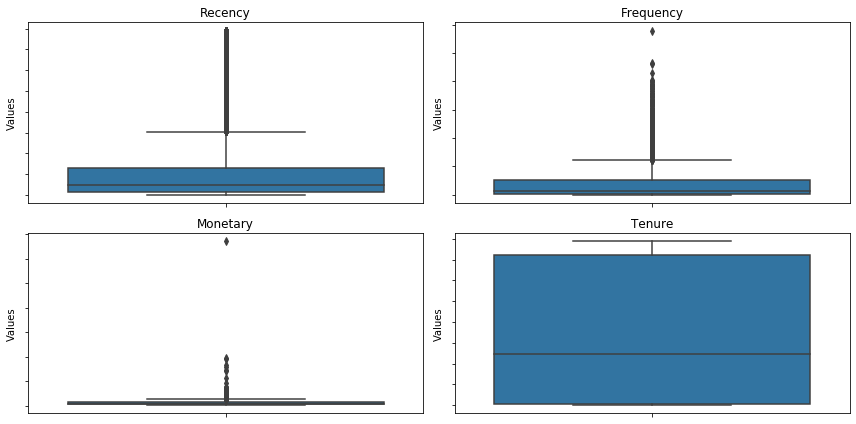

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))
sns.boxplot(rfm.Recency, orient='v', ax=ax[0][0])
ax[0][0].set_title('Recency')
ax[0][0].set_ylabel('Values')
ax[0][0].set_yticklabels([])
ax[0][0].set_xticklabels([])
sns.boxplot(rfm.Frequency, orient='v', ax=ax[0][1])
ax[0][1].set_title('Frequency')
ax[0][1].set_ylabel('Values')
ax[0][1].set_yticklabels([])
ax[0][1].set_xticklabels([])
sns.boxplot(rfm.Mean_value, orient='v', ax=ax[1][0])
ax[1][0].set_title('Monetary')
ax[1][0].set_ylabel('Values')
ax[1][0].set_yticklabels([])
ax[1][0].set_xticklabels([])
sns.boxplot(rfm.Tenure, orient='v', ax=ax[1][1])
ax[1][1].set_title('Tenure')
ax[1][1].set_ylabel('Values')
ax[1][1].set_yticklabels([])
ax[1][1].set_xticklabels([])
# sns.boxplot(rfm.Waste_ratio, orient='v', ax=ax[2][0])
# ax[2][0].set_title('Waste')
# ax[2][0].set_ylabel('Values')
# ax[2][0].set_yticklabels([])
# ax[2][0].set_xticklabels([])
plt.tight_layout()
plt.show()

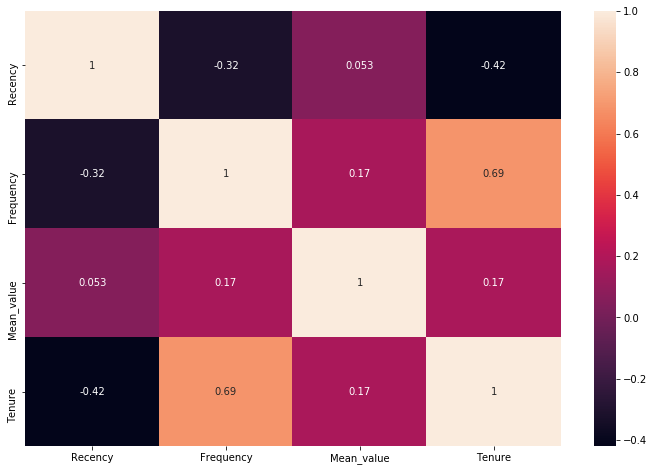

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(rfm.corr(), annot=True)

In [37]:
from scipy import stats
is_inlier = (np.abs(stats.zscore(rfm)) < 3).all(axis=1)
inlier = rfm[is_inlier]

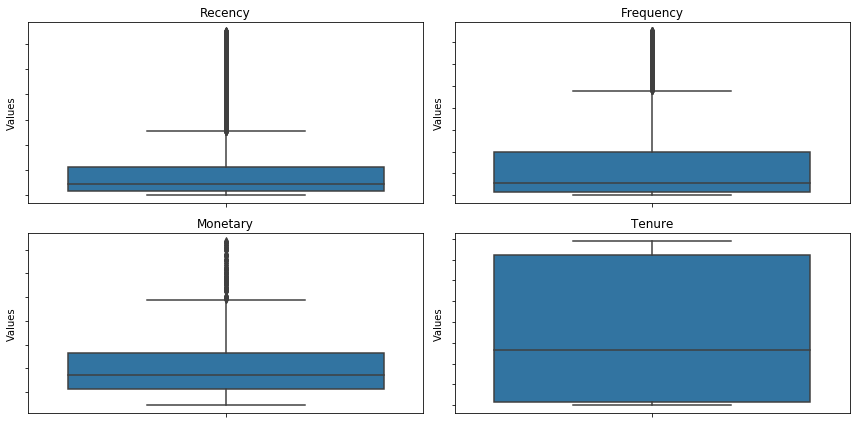

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))
sns.boxplot(inlier.Recency, orient='v', ax=ax[0][0])
ax[0][0].set_title('Recency')
ax[0][0].set_ylabel('Values')
ax[0][0].set_yticklabels([])
ax[0][0].set_xticklabels([])
sns.boxplot(inlier.Frequency, orient='v', ax=ax[0][1])
ax[0][1].set_title('Frequency')
ax[0][1].set_ylabel('Values')
ax[0][1].set_yticklabels([])
ax[0][1].set_xticklabels([])
sns.boxplot(inlier.Mean_value, orient='v', ax=ax[1][0])
ax[1][0].set_title('Monetary')
ax[1][0].set_ylabel('Values')
ax[1][0].set_yticklabels([])
ax[1][0].set_xticklabels([])
sns.boxplot(inlier.Tenure, orient='v', ax=ax[1][1])
ax[1][1].set_title('Tenure')
ax[1][1].set_ylabel('Values')
ax[1][1].set_yticklabels([])
ax[1][1].set_xticklabels([])
# sns.boxplot(inlier.Waste_ratio, orient='v', ax=ax[2][0])
# ax[2][0].set_title('Waste')
# ax[2][0].set_ylabel('Values')
# ax[2][0].set_yticklabels([])
# ax[2][0].set_xticklabels([])
plt.tight_layout()
plt.show()

# Data Transformation

In [39]:
in_rfmt = inlier.copy()
in_rfmt['Tenure'] = in_rfmt['Tenure']+ 1

In [40]:
# standardize variables
from sklearn.preprocessing import StandardScaler
# take the log to unskew the data
log_rfmt = np.log(in_rfmt)
# use fit_transfome from StandardScaler to standardize the data (mean=0, std=1)
scaler = StandardScaler()
scaled_rfmt_array = scaler.fit_transform(log_rfmt)
scaled_rfmt = pd.DataFrame(
    scaled_rfmt_array,
    columns=in_rfmt.columns,
    index=in_rfmt.index,
)

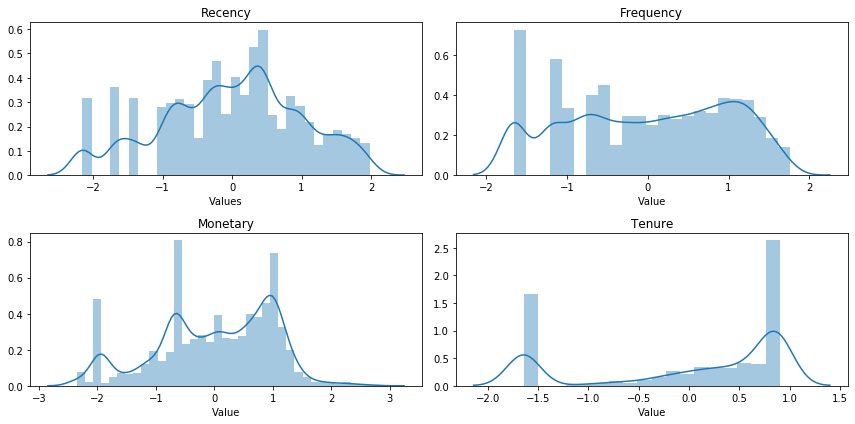

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))
sns.distplot(scaled_rfmt.Recency, ax=ax[0][0])
ax[0][0].set_title('Recency')
ax[0][0].set_xlabel('Values')
sns.distplot(scaled_rfmt.Frequency, ax=ax[0][1])
ax[0][1].set_title('Frequency')
ax[0][1].set_xlabel('Value')
sns.distplot(scaled_rfmt.Mean_value, ax=ax[1][0])
ax[1][0].set_title('Monetary')
ax[1][0].set_xlabel('Value')
sns.distplot(scaled_rfmt.Tenure, ax=ax[1][1])
ax[1][1].set_title('Tenure')
ax[1][1].set_xlabel('Value')
plt.tight_layout()
plt.show()

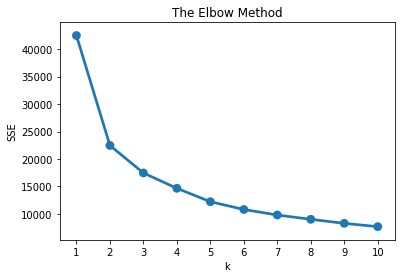

In [42]:
# find the ideal number of clusters
# Fit KMeans and calculate SSE for each k
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_rfmt)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center
    
# Plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE') 
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [77]:
# fit kmeans with 2 clustes
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(scaled_rfmt)
# extract the lables
cluster_labels_k2 = kmeans.labels_
# assing the cluster labels to the dataset
rfm_k2 = in_rfmt.assign(cluster = cluster_labels_k2)
# fit kmeans with 3 clustes
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(scaled_rfmt)
# extract the lables
cluster_labels_k3 = kmeans.labels_
# assing the cluster labels to the dataset
rfm_k3 = in_rfmt.assign(cluster = cluster_labels_k3)
# fit kmeans with 4 clustes
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(scaled_rfmt)
# extract the lables
cluster_labels_k4 = kmeans.labels_
# assing the cluster labels to the dataset
rfm_k4 = in_rfmt.assign(cluster = cluster_labels_k4)
# fit kmeans with 5 clustes
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(scaled_rfmt)
# extract the lables
cluster_labels_k5 = kmeans.labels_
# assing the cluster labels to the dataset
rfm_k5 = in_rfmt.assign(cluster = cluster_labels_k5)

In [78]:
# group the rfm_k2 dataset by the clusters
rfm_k2_summary = rfm_k2.groupby('cluster').agg(
    recency=('Recency',  'mean'),
    frequency=('Frequency', 'mean'),
    tenure=('Tenure', 'mean'),
    monetary=('Mean_value', 'mean'),
    samples=('Mean_value', 'count')
).round(0)
# group the rfm_k3 dataset by the clusters
rfm_k3_summary = rfm_k3.groupby('cluster').agg(
    recency=('Recency', 'mean'),
    frequency=('Frequency', 'mean'),
    tenure=('Tenure', 'mean'),
    monetary=('Mean_value', 'mean'),
    samples=('Mean_value', 'count')
).round(0)
# group the rfm_k4 dataset by the clusters
rfm_k4_summary = rfm_k4.groupby('cluster').agg(
    recency=('Recency',  'mean'),
    frequency=('Frequency', 'mean'),
    tenure=('Tenure', 'mean'),
    monetary=('Mean_value', 'mean'),
    samples=('Mean_value', 'count')
).round(0)
# group the rfm_k5 dataset by the clusters
rfm_k5_summary = rfm_k5.groupby('cluster').agg(
    recency=('Recency',  'mean'),
    frequency=('Frequency', 'mean'),
    tenure=('Tenure', 'mean'),
    monetary=('Mean_value', 'mean'),
    samples=('Mean_value', 'count')
).round(0)

In [97]:
rfm_k5_summary

,recency,frequency,tenure,monetary,samples
cluster,,,,,
0,8.0,74.0,337.0,60820.0,3349
1,71.0,2.0,4.0,21426.0,1935
2,98.0,3.0,3.0,63591.0,1027
3,86.0,23.0,198.0,57467.0,2216
4,22.0,19.0,142.0,27601.0,2095


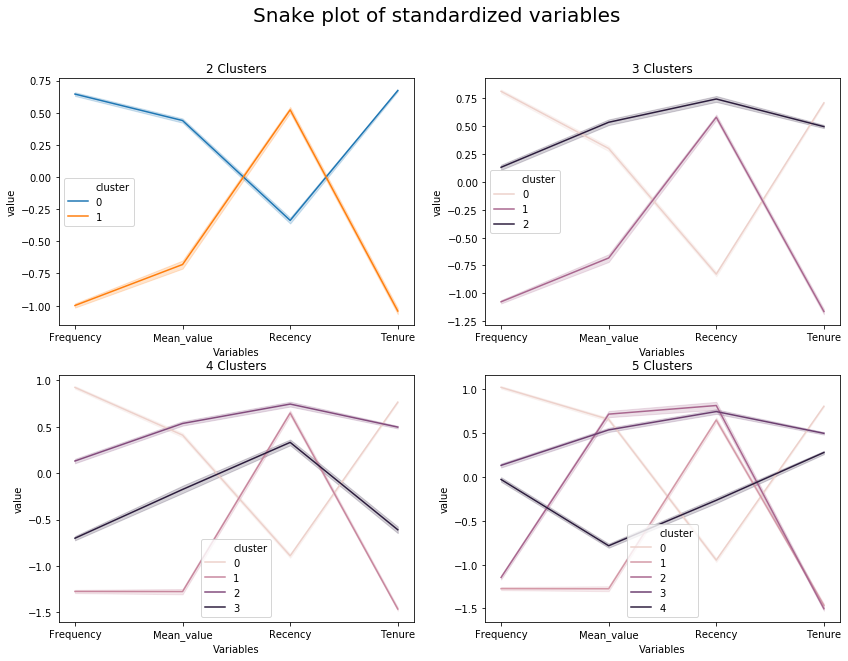

In [103]:
# assign the cluster labes for the scaled rfm
scaled_rfm_k2 = scaled_rfmt.copy()
scaled_rfm_k2['cluster'] = rfm_k2.cluster
scaled_rfm_k3 = scaled_rfmt.copy()
scaled_rfm_k3['cluster'] = rfm_k3.cluster
scaled_rfm_k4 = scaled_rfmt.copy()
scaled_rfm_k4['cluster'] = rfm_k4.cluster
scaled_rfm_k5 = scaled_rfmt.copy()
scaled_rfm_k5['cluster'] = rfm_k5.cluster
# melt the dataframes to get the required format
rfm_k2_melt = pd.melt(
    scaled_rfm_k2.reset_index(), 
    id_vars=['CustomerID', 'cluster'],
    value_vars=['Recency', 'Frequency', 'Mean_value', 'Tenure'], 
    var_name='attribute',
    value_name='value'
)
rfm_k3_melt = pd.melt(
    scaled_rfm_k3.reset_index(), 
    id_vars=['CustomerID', 'cluster'],
    value_vars=['Recency', 'Frequency', 'Mean_value', 'Tenure'], 
    var_name='attribute',
    value_name='value'
)
rfm_k4_melt = pd.melt(
    scaled_rfm_k4.reset_index(), 
    id_vars=['CustomerID', 'cluster'],
    value_vars=['Recency', 'Frequency', 'Mean_value', 'Tenure'], 
    var_name='attribute',
    value_name='value'
)
rfm_k5_melt = pd.melt(
    scaled_rfm_k5.reset_index(), 
    id_vars=['CustomerID', 'cluster'],
    value_vars=['Recency', 'Frequency', 'Mean_value', 'Tenure'], 
    var_name='attribute',
    value_name='value'
)
# plot the snakeplot for each dataset
fig, ax = plt.subplots(2, 2, figsize=(14,10))
sns.lineplot(
    x="attribute",
    y="value",
    hue='cluster',
    data=rfm_k2_melt,
    ax=ax[0][0],
)
ax[0][0].set_title('2 Clusters')
ax[0][0].set_xlabel('Variables')
sns.lineplot(
    x="attribute",
    y="value",
    hue='cluster',
    data=rfm_k3_melt,
    ax=ax[0][1],
)
ax[0][1].set_title('3 Clusters')
ax[0][1].set_xlabel('Variables')
sns.lineplot(
    x="attribute",
    y="value",
    hue='cluster',
    data=rfm_k4_melt,
    ax=ax[1][0],
)
ax[1][0].set_title('4 Clusters')
ax[1][0].set_xlabel('Variables')
sns.lineplot(
    x="attribute",
    y="value",
    hue='cluster',
    legend ='full',
    data=rfm_k5_melt,
    ax=ax[1][1],
)
ax[1][1].set_title('5 Clusters')
ax[1][1].set_xlabel('Variables')
fig.suptitle('Snake plot of standardized variables', fontsize=20)
plt.show()

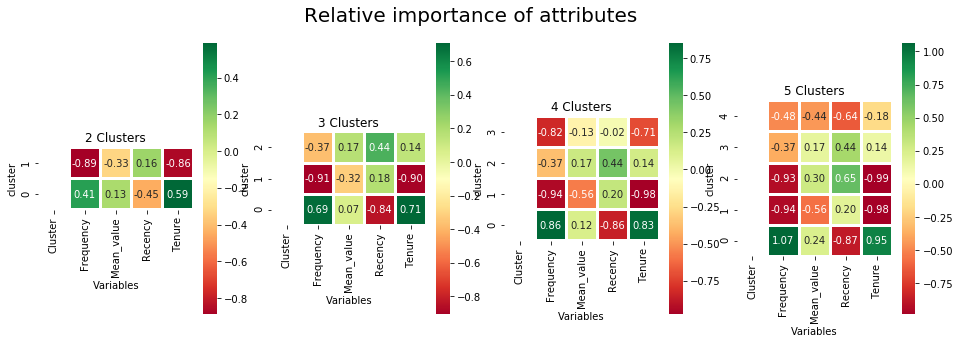

In [95]:
# relative importance of segment attributes
cluster_avg_k2 = rfm_k2.groupby(['cluster']).mean()
cluster_avg_k3 = rfm_k3.groupby(['cluster']).mean()
cluster_avg_k4 = rfm_k4.groupby(['cluster']).mean()
cluster_avg_k5 = rfm_k5.groupby(['cluster']).mean()
population_avg = rfm.mean()
relative_imp_k2 = cluster_avg_k2 / population_avg - 1
relative_imp_k3 = cluster_avg_k3 / population_avg - 1
relative_imp_k4 = cluster_avg_k4 / population_avg - 1
relative_imp_k5 = cluster_avg_k5 / population_avg - 1
fig, ax = plt.subplots(1, 4, figsize=(16,5))
sns.heatmap(
    data=relative_imp_k2,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    linewidths=2,
    square=True,
    ax=ax[0],
)
ax[0].set_ylim([0, 2])
ax[0].set_title('2 Clusters')
ax[0].set_xlabel('Variables')
sns.heatmap(
    data=relative_imp_k3,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    linewidths=2,
    square=True,
    ax=ax[1],
) 
ax[1].set_ylim([0, 3])
ax[1].set_title('3 Clusters')
ax[1].set_xlabel('Variables')
sns.heatmap(
    data=relative_imp_k4,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    linewidths=2,
    square=True,
    ax=ax[2],
) 
ax[2].set_ylim([0, 4])
ax[2].set_title('4 Clusters')
ax[2].set_xlabel('Variables')
sns.heatmap(
    data=relative_imp_k5,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    linewidths=2,
    square=True,
    ax=ax[3],
) 
ax[3].set_ylim([0, 5])
ax[3].set_title('5 Clusters')
ax[3].set_xlabel('Variables')
fig.suptitle('Relative importance of attributes', fontsize=20)
# plt.tight_layout()
plt.show()

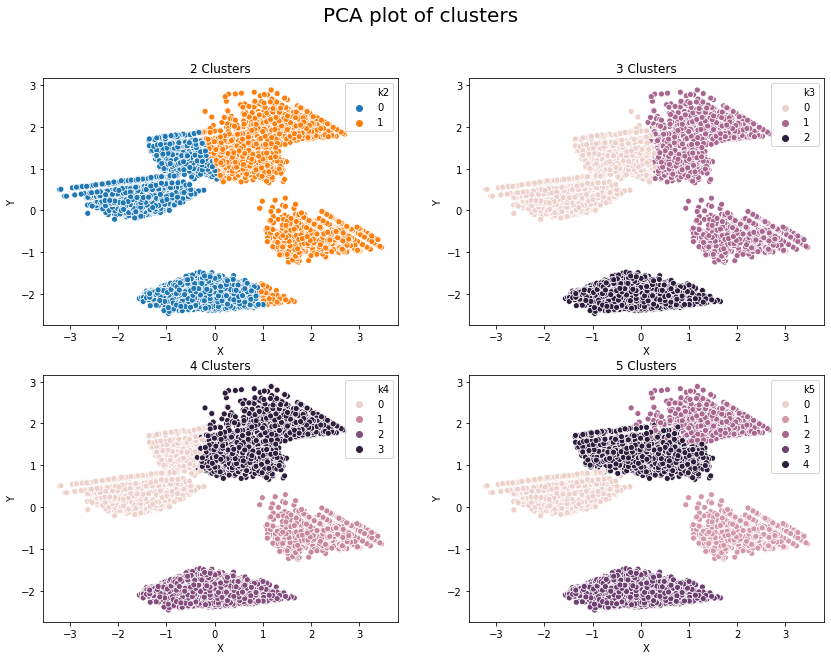

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_array = pca.fit_transform(scaled_rfmt)
pca_data = pd.DataFrame(pca_array, columns=['x', 'y'], index=scaled_rfmt.index)
pca_data['k2'] = rfm_k2.cluster
pca_data['k3'] = rfm_k3.cluster
pca_data['k4'] = rfm_k4.cluster
pca_data['k5'] = rfm_k5.cluster
fig, ax = plt.subplots(2, 2, figsize=(14,10))
sns.scatterplot(x='x', y='y', hue='k2', data=pca_data, ax=ax[0][0])
ax[0][0].set_title('2 Clusters')
ax[0][0].set_xlabel('X')
ax[0][0].set_ylabel('Y')
sns.scatterplot(x='x', y='y', hue='k3', data=pca_data, ax=ax[0][1])
ax[0][1].set_title('3 Clusters')
ax[0][1].set_xlabel('X')
ax[0][1].set_ylabel('Y')
sns.scatterplot(x='x', y='y', hue='k4', data=pca_data, ax=ax[1][0])
ax[1][0].set_title('4 Clusters')
ax[1][0].set_xlabel('X')
ax[1][0].set_ylabel('Y')
sns.scatterplot(x='x', y='y', hue='k5',legend ='full', data=pca_data, ax=ax[1][1])
ax[1][1].set_title('5 Clusters')
ax[1][1].set_xlabel('X')
ax[1][1].set_ylabel('Y')
fig.suptitle('PCA plot of clusters', fontsize=20)
plt.show()

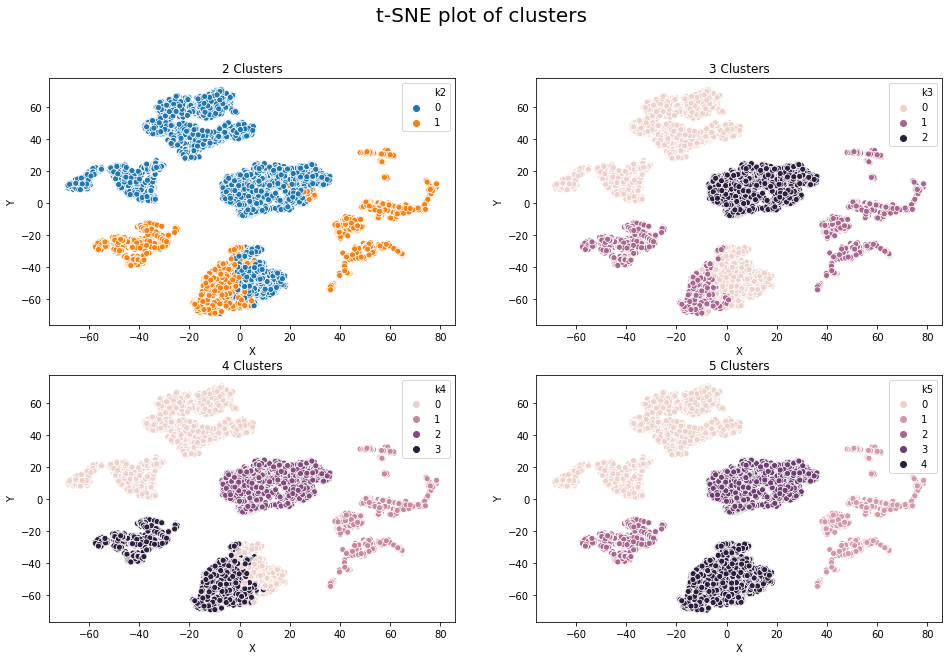

In [108]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=300, perplexity=80, early_exaggeration=20)
tsne_array = tsne.fit_transform(scaled_rfmt)
tsne_data = pd.DataFrame(tsne_array, columns=['x', 'y'], index=scaled_rfmt.index)
tsne_data['k2'] = rfm_k2.cluster
tsne_data['k3'] = rfm_k3.cluster
tsne_data['k4'] = rfm_k4.cluster
tsne_data['k5'] = rfm_k5.cluster
fig, ax = plt.subplots(2, 2, figsize=(16,10))
sns.scatterplot(x='x', y='y', hue='k2', data=tsne_data, ax=ax[0][0])
ax[0][0].set_title('2 Clusters')
ax[0][0].set_xlabel('X')
ax[0][0].set_ylabel('Y')
sns.scatterplot(x='x', y='y', hue='k3', data=tsne_data, ax=ax[0][1])
ax[0][1].set_title('3 Clusters')
ax[0][1].set_xlabel('X')
ax[0][1].set_ylabel('Y')
sns.scatterplot(x='x', y='y', hue='k4', data=tsne_data, ax=ax[1][0])
ax[1][0].set_title('4 Clusters')
ax[1][0].set_xlabel('X')
ax[1][0].set_ylabel('Y')
sns.scatterplot(x='x', y='y', hue='k5',legend = 'full', data=tsne_data, ax=ax[1][1])
ax[1][1].set_title('5 Clusters')
ax[1][1].set_xlabel('X')
ax[1][1].set_ylabel('Y')
fig.suptitle('t-SNE plot of clusters', fontsize=20)
# plt.tight_layout()
plt.show()

In [62]:
def optimal_kmeans(dataset, normalized_dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(normalized_dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(6.47,3))

            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=1000)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score: 0.182, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.006, Change from Previous Cluster: -0.176
No. Clusters: 4, Silhouette Score: -0.082, Change from Previous Cluster: -0.088
No. Clusters: 5, Silhouette Score: -0.042, Change from Previous Cluster: 0.04
No. Clusters: 6, Silhouette Score: -0.078, Change from Previous Cluster: -0.036
No. Clusters: 7, Silhouette Score: -0.082, Change from Previous Cluster: -0.004
No. Clusters: 8, Silhouette Score: -0.098, Change from Previous Cluster: -0.016
No. Clusters: 9, Silhouette Score: -0.076, Change from Previous Cluster: 0.022
No. Clusters: 10, Silhouette Score: -0.086, Change from Previous Cluster: -0.01


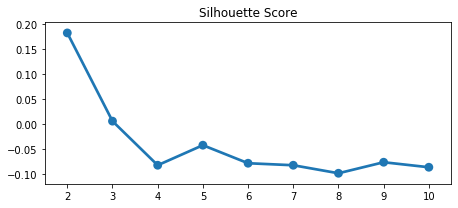

In [63]:
optimal_kmeans(in_rfmt, scaled_rfmt)

In [64]:
def kmeans(df, normalized_df, clusters_number):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        end : int. Ending range of kmeans to test.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''
    # Initialise TSNE
    
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalized_df)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = df.assign(Cluster = cluster_labels)
    
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    df_new['Cluster'] = cluster_labels
    return df_new

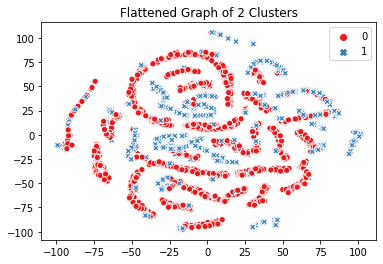

In [70]:
df_k2 = kmeans(in_rfmt, scaled_rfmt, 2)

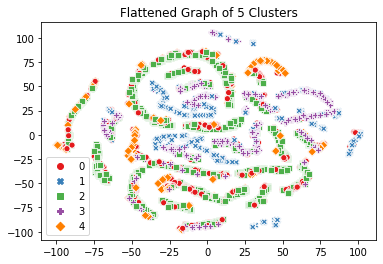

In [71]:
df_k5 = kmeans(in_rfmt, scaled_rfmt, 5)

In [73]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans):
    '''
    Transform dataframe and plot snakeplot
    '''
    # Transform df_normal as df and add cluster column
#     normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
#                                        index=df_rfm.index, 
#                                        columns=df_rfm.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Mean_value','Tenure'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

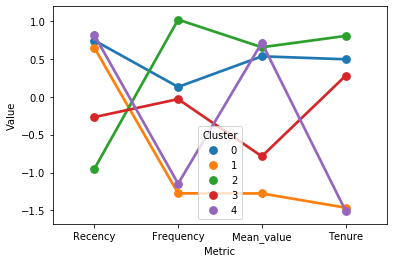

In [76]:
snake_plot(scaled_rfmt, df_k5)